## Python code for getting Youtube Text from video and then transforms it into a .srt file ready to be used.

In [73]:
# importing modules
from youtube_transcript_api import YouTubeTranscriptApi
import datetime
#Specify the url of the Youtube video
url = 'https://www.youtube.com/watch?v=9ynwDJcQsrU'
#Getting the video code from the url
video_code = url.split("=",1)[1]
#Specify the name of the srl file 
name = "text_file.txt"

In [74]:
# retrieve the available transcripts
transcript_list = YouTubeTranscriptApi.list_transcripts(video_code)
 
# iterate over all available transcripts
for transcript in transcript_list:
 
    # translating the transcript will return another
    # transcript object
    srt_translated = transcript.translate('en').fetch()
    #Print the list of available languages for translation 
    #print(transcript.translation_languages),
# creating or overwriting a file with the info inside
with open(name, "w") as f:
   
        # iterating through each element of list srt
    for i in srt_translated:
        # writing each element of srt on a new line
        f.write("{}\n".format(i))
        
        
# Uncoment for a list of available languages 
#transcript.translation_languages

## Word Cloud analysis

In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# plotly library
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud

# matplotlib library
import matplotlib.pyplot as plt

In [76]:
# Creating a file with the extracted text using the google translate APIs
with open(name, "w") as f:
   
    # Defining the counter
    counter = 0
    # iterating through each element of list srt and getting a particular element within the dictionary 
    for i in srt_translated:
        counter+=1
        start_time=str(datetime.timedelta(seconds=i['start'])).replace('.',',')
        # Replacing the dot with a comma according to srl format
        end_time=str(datetime.timedelta(seconds=i['start']+i['duration'])).replace('.',',')
        # writing each element of srt on a new line
        f.write("{}\n".format(i['text']))

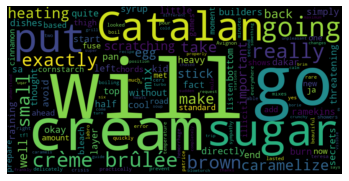

In [77]:
# Start with one review:
with open(name,'r') as file:
    text = file.read()

# Create and generate a word cloud image:
wordcloud = WordCloud(width=800, height=400).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

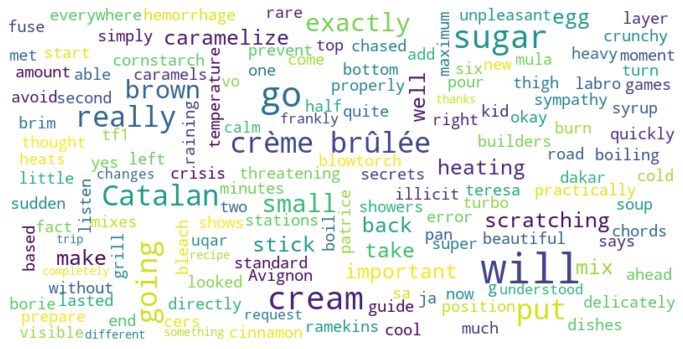

In [78]:
# lower max_font_size, change the maximum number of word, lighten the background, and increase the size of the image:
wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="white",width=800, height=400).generate(text)
plt.figure(figsize=[12,18])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
# Save the image in the img folder:
wordcloud.to_file("wordcloud.png")